# **Atividade de Aprendizagem de Máquina - Missão 7**

Discentes: Cynthia Moreira Maia, Lucas Benevides Viana de Amorim e Sara Bandeira Coutinho

Docente: Dr. Leandro Maciel Almeida

**Atividade:** Realizar experimentos visando definir uma abordagem de tratamento de dados desbalanceados e redução da dimensionalidade de modo a melhorar o desempenho de generalização do modelo. Objetiva-se seguir as seguintes etapas: 
*   Realizar exploração e pré-processamento dos dados.
*   Adotar k-fold 5x2 e considerar os modelos de classificaçao (Decision tree, K-NN, LVQ, SVM e redes neurais), ajustando os parametros.
*   Entregar relatorio com script e resultados.

## **Introdução**

Um dos tópicos na área de classificação de dados é o problema do desbalanceamento dos dados. Esse problema ocorre quando o número de objetos varia significativamente para as diferentes classes, ou seja, tem-se classes com um número de objetos bem maior (classe majoritária) ou bem menor (classe minoritária) que as demais classes [1].  Há algumas técnicas para lidar com esse problema, como: alterar métrica de desempenho; alterar o algoritmo para trabalhar com diferentes pesos ou custos para as classes e, talvez a abordagem mais comum, fazer uma nova amostra do conjunto de treinamento de maneira que fique equalizado o número de instâncias por classe [2]. 

Em relação à amostragem dos dados, tem-se algumas abordagens, que são: Undersampling (subamostragem) e Oversampling (sobamostragem). A abordagem de undersampling consiste em reduzir de maneira aleatória os exemplos da classe majoritária e igualar à quantidade de instâncias da classe minoritária, utilizada quando a quantidade de dados é suficiente [3]. Já a abordagem de oversampling, é utilizada quando a quantidade de dados é insuficiente, para a qual um algoritmo bem popular é o SMOTE. Este algoritmo gera novas amostras sintéticas das classes minoritárias, de forma a igualar sua numerosidade à da classe  majoritária [4]. 

Um outro problema que tratamos neste trabalho é a “maldição da dimensionalidade”, que é o efeito deteriorante que um número muito grande de atributos tem sobre a perfomance de um modelo de classificação. Para mitigar os efeitos deste problema, busca-se obter um subespaço reduzido de atributos que sejam adequados na representação dos padrões em questão [5]. Um dos algoritmos mais populares é o PCA (Análise de Componentes Principais), que busca reduzir a dimensionalidade do conjunto de dados, com menor perda possível de informação, correlacionando os exemplos. O algoritmo tem como objetivo principal explicar a variância de um vetor aleatório com p-variáveis, com combinações lineares das variáveis originais. Essas combinações são chamadas de componentes principais [6].

Dessa forma, este relatório teve dois objetivos principais, dos quais o primeiro foi de investigar a aplicação de cinco algoritmos de classificação (Árvore de Decisão, K-vizinhos mais próximos, Máquina de Vetor de Suporte, Quantização de Vetores de Aprendizagem e Perceptron Multi-Camadas), no conjunto de dados “Weight Lifting Exercises Monitored with Inertial Measurement Units Data Set”, oriundo do repositório da UCI, sem a aplicação de técnicas de balanceamento de dados e redução de dimensionalidade. Esse conjunto de dados foi utilizado para tarefa de classificação, no qual é composto de: 5 classes, 152 atributos (no total) e 39242 instâncias. Com a finalidade de investigar como uma atividade foi realizada pelo usuário e se foi bem realizada. Os participantes realizaram repetições de exercícios de bíceps utilizando halteres, quando o exercício era feito exatamente de acordo com a especificação, era classificado como “A” , já as demais classes correspondem aos erros comuns na realização da atividade: classe “B”, jogando os cotovelos para frente, classe “C” levantando o halter apenas até a metade, classe “D” abaixando o halter apenas até a metade e classe “E” jogando os quadris para frente.  Já o segundo objetivo deste trabalho foi de investigar novamente os cinco algoritmos de classificação, mas com a aplicação de técnicas de balanceamento de dados e redução de dimensionalidade no conjunto de dados “Weight Lifting Exercises Monitored with Inertial Measurement Units Data Set”. 

Ao final, foram feitas análises a respeito dos resultados obtidos, comparando-se as diferenças encontradas nos resultados mediante a adoção das duas abordagens. Por fim, aplicou-se um teste de hipóteses para avaliar a significância estatística dos resultados observados.



##**Experimentos**

Os algoritmos foram implementados na ferramenta Colab, com uso da linguagem Python. O pacote principal utilizado foi o sklearn.  

### Carregamento de bibliotecas

In [ ]:
!pip install sklearn-lvq

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#from sklearn.impute import SimpleImputer
#from sklearn_pandas import CategoricalImputer
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # decision tree
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier # knn
#!pip install sklearn_lvq
from sklearn_lvq import GmlvqModel # lvq 
from sklearn.svm import SVC # svm
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import geometric_mean_score
from sklearn.decomposition import PCA
import copy
from sklearn.dummy import DummyClassifier
import warnings

Carregando os dados originais:


In [ ]:
#Info sobre o dataset: http://groupware.les.inf.puc-rio.br/har#weight_lifting_exercises
#url = 'http://groupware.les.inf.puc-rio.br/static/WLE/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv'
#str_df = pd.read_csv(url, dtype=str)

In [ ]:
# df = str_df.copy()
# col_names = str_df.columns
# types_dict = {'user_name': str, 'raw_timestamp_part_1': str, 'raw_timestamp_part_2': str,
#               'cvtd_timestamp': str, 'new_window': str, 'classe': str}
# types_dict.update({col: float for col in col_names if col not in types_dict})
# for col, col_type in types_dict.items():
#   try:
#     df[col] = df[col].astype(col_type)
#   except:
#     for i in range(len(df[col])):
#       try:
#         df[col][i] = float(df[col][i])
#       except:
#         df[col][i] = np.nan
# for col, col_type in types_dict.items():
#     df[col] = df[col].astype(col_type)


Após corrigir problemas com valores fora do padrão (convertendo todos eles para NaN), salvamos o dataset resultante, o qual usaremos a partir de então para evitar o retrabalho computacional da célula acima.

In [ ]:
# df.to_csv('weight_lifting_excercises_processed.csv', index=False)
df = pd.read_csv('https://www.dropbox.com/s/dl/9zzodcxnetweu9j/weight_lifting_excercises_processed.csv')

## **Pré-Processamento**

Inicialmente, foi realizada uma análise exploratória dos dados com o objetivo de conhecer as principais características do conjunto de dados, como: se há valores faltosos, os tipos de atributos, estatística descritiva, etc. Conforme os resultados obtidos, há valores faltosos e a imputação dos dados foi realizada por meio da média. Verificou-se que o conjunto de dados têm atributos categóricos (atributo: new_window) que foi tratado por meio da técnica de one-hot-encoding, para que fosse transformado em atributo numérico (binário). Foram retirados alguns atributos que não são relevantes — ou que podem estar fortemente correlacionados à classe de maneira não intencionada — para o modelo (atributos: user_name, raw_timestamp_part_1, raw_timestamp_part_2, cvtd_timestamp). Outro fator observado, foi que os atributos estavam em escalas bem diferentes. Isso justificou a aplicação de uma técnica de normalização para que ficassem na mesma escala. Adotou-se a técnica de Min-Max, que consiste em colocar os valores em uma escala de [0,1].



In [ ]:
df.head()

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1.0,3.70,41.6,-82.8,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.18,0.02,-3.0,-18.0,...,277.0,-111.0,26.5,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1.0,3.66,42.8,-82.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.96,0.14,0.05,-2.0,-13.0,...,281.0,-112.0,26.2,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1.0,3.58,43.7,-82.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,0.08,0.05,-2.0,-6.0,...,275.0,-114.0,26.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E
3,eurico,1322489729,82654,28/11/2011 14:15,no,1.0,3.56,44.4,-82.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,0.03,0.08,-6.0,-5.0,...,285.0,-115.0,25.8,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.24,-0.79,-185.0,182.0,188.0,-1120.0,1400.0,-855.0,E
4,eurico,1322489729,90637,28/11/2011 14:15,no,1.0,3.57,45.1,-81.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,0.00,0.13,-4.0,-9.0,...,292.0,-117.0,25.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,-0.27,-0.82,-188.0,195.0,188.0,-1100.0,1400.0,-843.0,E


In [ ]:
df = df.drop(columns= ['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'cvtd_timestamp'])

In [ ]:
df.head()

,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,...,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,kurtosis_yaw_forearm,skewness_roll_forearm,skewness_pitch_forearm,skewness_yaw_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,no,1.0,3.70,41.6,-82.8,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.02,0.18,0.02,-3.0,-18.0,22.0,387.0,525.0,-267.0,...,277.0,-111.0,26.5,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,no,1.0,3.66,42.8,-82.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.96,0.14,0.05,-2.0,-13.0,16.0,405.0,512.0,-254.0,...,281.0,-112.0,26.2,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,no,1.0,3.58,43.7,-82.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88,0.08,0.05,-2.0,-6.0,8.0,409.0,511.0,-244.0,...,275.0,-114.0,26.0,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E
3,no,1.0,3.56,44.4,-82.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,0.03,0.08,-6.0,-5.0,7.0,422.0,513.0,-221.0,...,285.0,-115.0,25.8,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,-0.24,-0.79,-185.0,182.0,188.0,-1120.0,1400.0,-855.0,E
4,no,1.0,3.57,45.1,-81.9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.77,0.00,0.13,-4.0,-9.0,0.0,418.0,508.0,-208.0,...,292.0,-117.0,25.5,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,-0.27,-0.82,-188.0,195.0,188.0,-1100.0,1400.0,-843.0,E


In [ ]:
# O dataset possui valores faltando?
np.any(df.isnull().sum())

True

In [ ]:
# Verificamos que essas 6 colunas não têm um valor sequer, portanto precisamos removê-las:
colunas_NaN = ['kurtosis_yaw_belt','skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 
               'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm',  'skewness_yaw_forearm']

df = df.drop(columns=colunas_NaN)

In [ ]:
#Para as demais colunas numéricas que possuem NaN, imputaremos a média:
from sklearn.impute import SimpleImputer
numeric_columns = df.select_dtypes(include="number").columns
for col in numeric_columns:
        df[col].fillna(df[col].mean(), inplace = True)

In [ ]:
# O dataset possui valores faltando?
np.any(df.isnull().sum())

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39242 entries, 0 to 39241
Columns: 149 entries, new_window to classe
dtypes: float64(147), object(2)
memory usage: 44.6+ MB


In [ ]:
# Calculando algumas estatísticas para cada atributo:
df.describe()

,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,skewness_roll_belt,skewness_roll_belt.1,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,yaw_arm,...,accel_dumbbell_z,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,skewness_roll_forearm,skewness_pitch_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.0,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,...,39242.00000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.0,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000
mean,432.322282,64.928120,0.423624,-10.827983,11.378982,-0.181088,4.533324,-0.029880,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,-0.006643,0.040104,-0.131533,-5.680954,30.459125,-73.351027,55.718185,593.863768,-345.204577,17.505409,-4.301044,-0.906408,...,-38.46068,-326.934041,220.321576,44.901186,33.751627,11.077626,18.876811,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,34.676112,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,0.146381,0.095838,0.147643,-63.954814,162.981005,-55.494751,-316.640326,379.762296,395.010309
std,247.966725,62.672987,22.400539,94.982455,7.732219,0.535903,1.582706,0.140073,0.319686,14.141790,1.161918,0.535972,14.007953,1.095503,0.535972,3.866297,0.348178,0.0,0.302948,9.152726,0.339090,3.140621,3.347063,0.110511,0.767811,13.992176,1.548144,248.854011,0.207560,0.078789,0.239324,29.686483,28.651538,100.421528,64.612256,35.479501,64.731109,72.754832,30.650922,71.658473,...,109.69346,341.519275,327.300612,139.838061,107.963941,28.203015,103.468566,0.358226,0.603385,0.097249,0.159429,4.709624,13.852092,0.358470,3.316757,16.119978,0.358470,3.812565,21.546438,0.0,10.088146,5.183997,11.563309,8.695128,1357.282923,3.740385,1.277701,38.772231,11.314842,7.533987,1055.801478,1.827178,3.735124,1.337704,180.940999,199.580505,137.692832,345.893844,507.055260,368.098954
min,1.000000,-28.900000,-56.200000,-180.000000,0.000000,-3.333333,-2.21052

In [ ]:
df.head()

,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,skewness_roll_belt,skewness_roll_belt.1,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,...,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,skewness_roll_forearm,skewness_pitch_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,no,1.0,3.70,41.6,-82.8,3.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,2.02,0.18,0.02,-3.0,-18.0,22.0,387.0,525.0,-267.0,132.0,-43.7,...,-471.0,191.0,277.0,-111.0,26.5,138.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,30.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,no,1.0,3.66,42.8,-82.5,2.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.96,0.14,0.05,-2.0,-13.0,16.0,405.0,512.0,-254.0,129.0,-45.3,...,-472.0,184.0,281.0,-112.0,26.2,138.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,31.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,no,1.0,3.58,43.7,-82.3,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.88,0.08,0.05,-2.0,-6.0,8.0,409.0,511.0,-244.0,125.0,-46.8,...,-468.0,190.0,275.0,-114.0,26.0,137.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,32.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E
3,no,1.0,3.56,44.4,-82.1,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.80,0.03,0.08,-6.0,-5.0,7.0,422.0,513.0,-221.0,120.0,-48.1,...,-469.0,184.0,285.0,-115.0,25.8,137.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,33.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,0.02,-0.24,-0.79,-185.0,182.0,188.0,-1120.0,1400.0,-855.0,E
4,no,1.0,3.57,45.1,-81.9,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2

Há um atributo categórico 'new_window' que precisamos codificar. Usaremos a técnica de One Hot Encoding:

In [ ]:
# One hot encoding:
categorical_columns = df.select_dtypes(exclude='number').columns[:-1] #todas as colunas categóricas, exceto a classe
df['new_window'] = df['new_window'].astype(pd.api.types.CategoricalDtype(['no', 'yes']))
att_encoded = pd.get_dummies(df['new_window'], prefix = 'new_window')
df = df.drop(['new_window'], axis = 1)
df = pd.concat([att_encoded, df], axis = 1)

# como há apenas dois valores, para evitar o problema conhecido como Dummy Trap,
# removeremos a new_window_no, já que ela é simplesmente a negação da new_window_yes
df = df.drop(['new_window_no'], axis = 1)

In [ ]:
df.head()

,new_window_yes,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,skewness_roll_belt,skewness_roll_belt.1,max_roll_belt,max_picth_belt,max_yaw_belt,min_roll_belt,min_pitch_belt,min_yaw_belt,amplitude_roll_belt,amplitude_pitch_belt,amplitude_yaw_belt,var_total_accel_belt,avg_roll_belt,stddev_roll_belt,var_roll_belt,avg_pitch_belt,stddev_pitch_belt,var_pitch_belt,avg_yaw_belt,stddev_yaw_belt,var_yaw_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,magnet_belt_x,magnet_belt_y,magnet_belt_z,roll_arm,pitch_arm,...,magnet_dumbbell_x,magnet_dumbbell_y,magnet_dumbbell_z,roll_forearm,pitch_forearm,yaw_forearm,kurtosis_roll_forearm,kurtosis_picth_forearm,skewness_roll_forearm,skewness_pitch_forearm,max_roll_forearm,max_picth_forearm,max_yaw_forearm,min_roll_forearm,min_pitch_forearm,min_yaw_forearm,amplitude_roll_forearm,amplitude_pitch_forearm,amplitude_yaw_forearm,total_accel_forearm,var_accel_forearm,avg_roll_forearm,stddev_roll_forearm,var_roll_forearm,avg_pitch_forearm,stddev_pitch_forearm,var_pitch_forearm,avg_yaw_forearm,stddev_yaw_forearm,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,0,1.0,3.70,41.6,-82.8,3.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,2.02,0.18,0.02,-3.0,-18.0,22.0,387.0,525.0,-267.0,132.0,-43.7,...,-471.0,191.0,277.0,-111.0,26.5,138.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,30.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.05,-0.37,-0.43,-170.0,155.0,184.0,-1160.0,1400.0,-876.0,E
1,0,1.0,3.66,42.8,-82.5,2.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.96,0.14,0.05,-2.0,-13.0,16.0,405.0,512.0,-254.0,129.0,-45.3,...,-472.0,184.0,281.0,-112.0,26.2,138.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,31.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.06,-0.37,-0.59,-178.0,164.0,182.0,-1150.0,1410.0,-871.0,E
2,0,1.0,3.58,43.7,-82.3,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.88,0.08,0.05,-2.0,-6.0,8.0,409.0,511.0,-244.0,125.0,-46.8,...,-468.0,190.0,275.0,-114.0,26.0,137.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,32.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,-0.05,-0.27,-0.72,-182.0,172.0,185.0,-1130.0,1400.0,-863.0,E
3,0,1.0,3.56,44.4,-82.1,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.090584,0.0,0.830157,66.931881,1.247128,6.931842,-0.011285,0.591418,0.916713,-7.575365,1.319905,113.853228,1.80,0.03,0.08,-6.0,-5.0,7.0,422.0,513.0,-221.0,120.0,-48.1,...,-469.0,184.0,285.0,-115.0,25.8,137.0,-0.639595,0.348718,-0.001577,-0.164532,23.059714,81.976758,-0.639788,-1.045054,-55.914541,-0.639788,24.104815,137.891275,0.0,33.0,33.502839,33.349268,41.448644,5254.135003,10.756518,7.811293,137.371168,17.963387,45.254871,4702.779079,0.02,-0.24,-0.79,-185.0,182.0,188.0,-1120.0,1400.0,-855.0,E
4,0,1.0,3.57,45.1,-81.9,1.0,-0.181088,4.533324,-0.02988,-0.210838,-5.754827,12.655542,-0.179554,-9.662813,10.564958,-0.179554,3.908045,2.

#### Separação das variáveis preditoras (X) da variável alvo (y):

In [ ]:
# Separando X e y:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[[-1]]].to_numpy().ravel()

### Separando em 2 folds para validação cruzada repetida 5 vezes:

In [ ]:
rkf = RepeatedKFold(n_splits=2, n_repeats=5, random_state=0)
X_train_folds = []
y_train_folds = []
X_test_folds = []
y_test_folds = []
for train_index, test_index in rkf.split(X):
  X_train_folds.append(X[train_index])
  X_test_folds.append(X[test_index])
  y_train_folds.append(y[train_index])
  y_test_folds.append(y[test_index])


###Normalização dos Dados

In [ ]:
# Normalização com min-max
mm = MinMaxScaler()
for i in range(len(X_train_folds)):
    X_train_folds[i] = mm.fit_transform(X_train_folds[i])
    X_test_folds[i] = mm.transform(X_test_folds[i])

## **Grid search**

Com o objetivo de estabelecer as melhores escolhas de parâmetros adotados em cada algoritmo de classificação, realizou-se o tuning dos hiperparâmetros por meio da técnica de busca em grade (GridSearch). Para tanto, foi utilizado o pacote *GridSearchCV*.  Os dados foram divididos, de tal forma, que uma parte dos dados de treinamento fossem utilizados para validação e ajustes dos hiperparâmetros. 

In [ ]:
# Separando um conjunto de validação para o GridSearch
X_train_all = np.concatenate(X_train_folds)
y_train_all = np.concatenate(y_train_folds)
rest_X , val_x, rest_y , val_y = train_test_split(X_train_all, y_train_all, test_size=0.003)
val_x.shape

(942, 148)

#### **Classificador Árvore de Decisão**



Foi utilizado o pacote do *sklearn* para implementação da árvore e foram verificados os seguintes parâmetros: máximo de profundidade da árvore e o critério de decisão.

In [ ]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,3,4,6]
parameters = dict(criterion=criterion,max_depth=max_depth)
dt = GridSearchCV(decisiontree, parameters)
dt.fit(val_x, val_y)
print('Os melhores parâmetros foram:', dt.best_params_)
best_params_criterion = dt.best_params_['criterion']
best_params_max_depth = dt.best_params_['max_depth']

Os melhores parâmetros foram: {'criterion': 'entropy', 'max_depth': 6}


#### **Classificador kNN**

Foi utilizado o pacote do *sklearn* para implementação do kNN e verificou-se os melhores valores para *k* e qual a melhor distância.





In [ ]:
classifier = KNeighborsClassifier()
k_list = list(range(2,6))
metric = ['euclidean','minkowski']
param_grid= dict(n_neighbors=k_list, metric=metric)
knn = GridSearchCV(classifier, param_grid)
knn.fit(val_x, val_y)
print('Os melhores parâmetros foram:', knn.best_params_)
best_n = knn.best_params_['n_neighbors']

Os melhores parâmetros foram: {'metric': 'euclidean', 'n_neighbors': 2}


#### **Classificador LVQ**

Utilizou-se o pacote *sklearn* para implementação do LVQ e verificou-se os melhores valores para regularização.

In [ ]:
#!pip install sklearn-lvq

In [ ]:
warnings.filterwarnings(action='ignore')
glvq = GmlvqModel(gtol=1e-1, max_iter=150)
param_grid = {'regularization': [0.0, 0.1, 0.5] }#, 'beta': [1, 2]}
clf = GridSearchCV(glvq,param_grid)
clf.fit(val_x, val_y)
print('O melhor:', clf.best_params_)
best_reg = clf.best_params_['regularization']
#best_beta = clf.best_params_['beta']
warnings.filterwarnings(action='default') #reabilitando os warnings

O melhor: {'regularization': 0.1}


#### **Classificador SVM**

Fez uso do pacote do *sklearn* para implementação do SVM e verificou-se os melhores valores para o parâmetro de regularização (C) e também qual o melhor kernel.

In [ ]:
svm = SVC()
param_grid = {'C': [0.5, 1.0, 10], 'kernel': ['rbf', 'sigmoid']}
clf = GridSearchCV(svm,param_grid)
clf.fit(val_x, val_y)
print('O melhor:', clf.best_params_)
best_C = clf.best_params_['C']
best_kernel = clf.best_params_['kernel']

O melhor: {'C': 10, 'kernel': 'rbf'}


#### **Classificador Redes Neurais (MLP)**

E também fez uso do pacote do *sklearn* para implementação do MLP e verificou-se a melhor função de ativação para o problema em questão e o melhor valor para o alfa.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore') #muitos warnings de não convergência
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(5, 5), random_state=0)
param_grid = {'activation': ['relu', 'elu'], 'alpha': [1e-3, 1e-5, 1e-7]}
clf = GridSearchCV(mlp,param_grid)
clf.fit(val_x, val_y)
print('O melhor:', clf.best_params_)
best_activation = clf.best_params_['activation']
best_alpha = clf.best_params_['alpha']
warnings.filterwarnings(action='default') #reabilitando os warnings

O melhor: {'activation': 'relu', 'alpha': 1e-07}


### **Definição dos modelos**
Com base nos parâmetros obtidos nas buscas acima, definimos os modelos:

In [ ]:
models = {'LVQ': GmlvqModel(regularization=0.1, gtol=1e-1, max_iter=150),
          'DT':DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0),
          'KNN': KNeighborsClassifier(n_neighbors=3, metric='euclidean', n_jobs=-1),
          'SVM': SVC(kernel='rbf', C=10, max_iter=500),
          'MLP': MLPClassifier(activation='relu', alpha=1e-07, solver='adam', hidden_layer_sizes=(5, 5), random_state=0),
          'Dummy': DummyClassifier(strategy="most_frequent")
         }

### **Base Original**

Como dito na introdução do relatório, um dos objetivos foi de investigar os algoritmos de classificação no conjunto de dados original, sem uso de técnicas de balanceamento de classes e de redução de dimensionalidade. Dessa forma, são apresentados a seguir os desempenhos dos algoritmos no conjunto de dados original. 

#### Validação cruzada

In [ ]:
def cros_val(X_train_folds, y_train_folds, X_test_folds, y_test_folds, models):
    metrics = {'acc':{}, 'f1':{}, 'gmean':{}}
    # Validação cruzada 2-folds x 5:
    for name, model in models.items():
        print(f'\nModelo {name}: ')
        acc_folds = []
        f1_folds = []
        gmean_folds = []
        for i in range(len(X_train_folds)):
            print('.',end='')
            model.fit(X_train_folds[i], y_train_folds[i])
            y_pred = model.predict(X_test_folds[i])
            y_true = y_test_folds[i]
            #Calculando as métricas:
            acc_folds.append(accuracy_score(y_true, y_pred))
            f1_folds.append(f1_score(y_true, y_pred, average='macro'))
            gmean_folds.append(geometric_mean_score(y_true, y_pred, average='macro'))
        metrics['acc'][name] = acc_folds
        metrics['f1'][name] = f1_folds
        metrics['gmean'][name] = gmean_folds
    return metrics

In [ ]:
#Executar validação cruzada:
warnings.filterwarnings(action="ignore") # havia warning de Deprecation no LVQ, e ConvergenceWarning no SVM, ignorando...
metrics_orig = cros_val(X_train_folds, y_train_folds, X_test_folds, y_test_folds, models)


Modelo LVQ: 
..........
Modelo DT: 
..........
Modelo KNN: 
..........
Modelo SVM: 
..........
Modelo MLP: 
..........
Modelo Dummy: 
..........

In [ ]:
print('Média das métricas para os modelos:')
for name in list(models.keys()):
    print(f'*** Modelo {name} ***')
    print('Acurácia = ', np.mean(metrics_orig['acc'][name]))
    print('F1 = ', np.mean(metrics_orig['f1'][name]))
    print('G-Mean = ', np.mean(metrics_orig['gmean'][name]))

Média das métricas para os modelos:
*** Modelo LVQ ***
Acurácia =  0.2629580551449977
F1 =  0.19917706370929492
G-Mean =  0.4342443680438392
*** Modelo DT ***
Acurácia =  0.644314764792824
F1 =  0.6121011894115099
G-Mean =  0.7527262341424032
*** Modelo KNN ***
Acurácia =  0.97875235716834
F1 =  0.977606824443763
G-Mean =  0.9859613084472034
*** Modelo SVM ***
Acurácia =  0.8373273533459049
F1 =  0.8233758962912521
G-Mean =  0.8905511903714303
*** Modelo MLP ***
Acurácia =  0.6671474440650325
F1 =  0.6488846628417411
G-Mean =  0.7697467133323205
*** Modelo Dummy ***
Acurácia =  0.284363691962693
F1 =  0.08856076826720993
G-Mean =  0.4


### **Base Balanceada e com Redução de Dimensionalidade**

Aqui são apresentados os desempenhos dos algoritmos de classificação no conjunto de dados modificado. Em que aplicou-se no conjunto de dados uma técnica para o balanceamento dos dados (*Undersamplig*) e uma para redução da dimensionalidade (*PCA*).

In [ ]:
X_train_folds_br = copy.deepcopy(X_train_folds)
X_test_folds_br = copy.deepcopy(X_test_folds)

In [ ]:
# Vamos realizar o balanceamento das classes com Subamostragem aleatória:
y_train_folds_br = copy.deepcopy(y_train_folds)
undersample = RandomUnderSampler(sampling_strategy='all')
for i in range(len(X_train_folds_br)):
    #X_train_folds_br[i], y_train_folds_br[i] = SMOTE().fit_resample(X_train_folds_br[i], y_train_folds_br[i])
    X_train_folds_br[i], y_train_folds_br[i] = undersample.fit_resample(X_train_folds_br[i], y_train_folds_br[i])
    
print(f'Antes: {Counter(y_train_folds[1])}, Depois: {Counter(y_train_folds_br[1])}')
      

Antes: Counter({'A': 5591, 'B': 3736, 'E': 3633, 'C': 3454, 'D': 3207}), Depois: Counter({'A': 3207, 'B': 3207, 'C': 3207, 'D': 3207, 'E': 3207})


In [ ]:
# Redução de dimensionalidade:
pca = PCA(random_state=42, n_components = 0.9)
for i in range(len(X_train_folds_br)):
    X_train_folds_br[i] = pca.fit_transform(X_train_folds_br[i])
    X_test_folds_br[i] = pca.transform(X_test_folds_br[i])


In [ ]:
print(f'Antes: {X_train_folds[0].shape}, Depois: {X_train_folds_br[0].shape}')

Antes: (19621, 148), Depois: (16125, 18)


#### Validação cruzada

In [ ]:
#Executar validação cruzada:
warnings.filterwarnings(action="ignore") # havia warning de Deprecation no LVQ, e ConvergenceWarning no SVM, ignorando...
metrics_br = cros_val(X_train_folds_br, y_train_folds_br, X_test_folds_br, y_test_folds, models)


Modelo LVQ: 
..........
Modelo DT: 
..........
Modelo KNN: 
..........
Modelo SVM: 
..........
Modelo MLP: 
..........
Modelo Dummy: 
..........

In [ ]:
print('Média das métricas para os modelos:')
for name in list(models.keys()):
    print(f'*** Modelo {name} ***')
    print('Acurácia = ', np.mean(metrics_br['acc'][name]))
    print('F1 = ', np.mean(metrics_br['f1'][name]))
    print('G-Mean = ', np.mean(metrics_br['gmean'][name]))

Média das métricas para os modelos:
*** Modelo LVQ ***
Acurácia =  0.24056368176953263
F1 =  0.22452239159979456
G-Mean =  0.4453591734708124
*** Modelo DT ***
Acurácia =  0.5440956118444523
F1 =  0.5376351247909137
G-Mean =  0.6954184187902488
*** Modelo KNN ***
Acurácia =  0.9544824422812294
F1 =  0.9525151904257276
G-Mean =  0.9710035103507583
*** Modelo SVM ***
Acurácia =  0.9539880740023443
F1 =  0.9507522929980636
G-Mean =  0.9696716362888103
*** Modelo MLP ***
Acurácia =  0.6191376586310586
F1 =  0.6039377327842926
G-Mean =  0.7452220394662092
*** Modelo Dummy ***
Acurácia =  0.284363691962693
F1 =  0.08856076826720993
G-Mean =  0.4


## Carregando resultados

Carregando as métricas previamente salvas, para não precisar rodar novamente os modelos:

In [ ]:
metrics_orig = {'acc': {'DT': [0.6532796493552826,
   0.6294276540441364,
   0.6239233474338719,
   0.652107435910504,
   0.6666326894653687,
   0.6320778757453749,
   0.6303450384791804,
   0.6617399724784669,
   0.6326384995667906,
   0.6609754854492635],
  'Dummy': [0.2849497986850823,
   0.2837775852403038,
   0.28311502981499415,
   0.28561235411039193,
   0.2833698588247286,
   0.2853575251006575,
   0.28617297793180774,
   0.2825544059935783,
   0.28877223383109935,
   0.27995515009428673],
  'KNN': [0.977473115539473,
   0.9797665766270832,
   0.9770653891238978,
   0.9792059528056674,
   0.9804291320523928,
   0.977473115539473,
   0.9781866367667296,
   0.9763518678966413,
   0.9817032771010652,
   0.979868508230977],
  'LVQ': [0.28525559349676366,
   0.2559502573772998,
   0.26461444370827175,
   0.24830538708526578,
   0.22068192243004944,
   0.31777177513888183,
   0.2875490545843739,
   0.27185158758473066,
   0.25645991539676877,
   0.22114061464757148],
  'MLP': [0.6442587024106824,
   0.6836043015136843,
   0.6389072932062586,
   0.6804953875949238,
   0.6025686764181234,
   0.6640843993680241,
   0.7573008511288926,
   0.6102135467101575,
   0.6791702767443045,
   0.7108710055552724],
  'SVM': [0.7801844962030478,
   0.8401202792925947,
   0.8245757096987921,
   0.8571428571428571,
   0.8625961979511748,
   0.8227919066306508,
   0.8412924927373733,
   0.8421079455685235,
   0.8854288772233831,
   0.8170327710106519]},
 'f1': {'DT': [0.6193397286564901,
   0.5979852227107015,
   0.5744614114813883,
   0.6328396962096848,
   0.6369975279840933,
   0.6001342323058856,
   0.597406417961673,
   0.6302626928371822,
   0.5989761898051359,
   0.6326087741628645],
  'Dummy': [0.08870379184515312,
   0.08841954821549089,
   0.0882586590403559,
   0.08886422200198216,
   0.08832055915174139,
   0.08880253766851706,
   0.08899984149627517,
   0.08812239221140472,
   0.08962708110887016,
   0.08748904993230867],
  'KNN': [0.9762542009258246,
   0.9786504949858592,
   0.9759381883274539,
   0.9780685861209759,
   0.9792805374497533,
   0.9761257541154803,
   0.9771981650839697,
   0.9750455100258,
   0.9809266960748619,
   0.9785801113276509],
  'LVQ': [0.19382514067009418,
   0.1831668802594501,
   0.18427160947582916,
   0.18038253525608502,
   0.20063798374768876,
   0.28201942639835176,
   0.15324194160608315,
   0.2513984539504987,
   0.15710352093306734,
   0.2057231447958011],
  'MLP': [0.6234660664002106,
   0.6686296827044889,
   0.6204394212133707,
   0.6610399416754316,
   0.5835269211001594,
   0.6458338714637156,
   0.7403828972823796,
   0.5884153535785054,
   0.6639471112305801,
   0.6931653617685694],
  'SVM': [0.7618227244579704,
   0.8298903437436442,
   0.796455690052756,
   0.8462022394616863,
   0.8519229139149143,
   0.8164659378196342,
   0.8279937692766831,
   0.8290537571559472,
   0.8758619785985621,
   0.7980896084307243]},
 'gmean': {'DT': [0.7596510918198377,
   0.7436484736824363,
   0.7335147388045336,
   0.7576819274005893,
   0.7686399039270431,
   0.744953276235285,
   0.7431508324183025,
   0.76566285512037,
   0.7436843525046639,
   0.7666748895109717],
  'Dummy': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
  'KNN': [0.985012762842793,
   0.986698504974776,
   0.9848881873821137,
   0.9862884199309844,
   0.9868580308078058,
   0.9851512106746744,
   0.985832515045521,
   0.9843266350080733,
   0.9878396467491029,
   0.986717171056191],
  'LVQ': [0.43299325795878585,
   0.4344134512655031,
   0.42369409513593426,
   0.40583663116305235,
   0.4239458311311916,
   0.4866667734197897,
   0.4434421312845792,
   0.45546633441778417,
   0.4261645522249263,
   0.4098206224368456],
  'MLP': [0.752156373579331,
   0.7850666233182046,
   0.7489007292185955,
   0.7795369389264812,
   0.7237176731300252,
   0.7686881271924959,
   0.8352223340097676,
   0.7275653412632042,
   0.777507733688578,
   0.7991052589965206],
  'SVM': [0.8515226386344839,
   0.8937556929262287,
   0.8796172788633356,
   0.9043585929839921,
   0.9091918722398202,
   0.8827081689671616,
   0.8937475561507321,
   0.8935263537449185,
   0.9207026030574288,
   0.8763811461462009]}}

In [ ]:
metrics_br = {'acc': {'DT': [0.5320829723255696,
   0.5369247235105244,
   0.550073900412823,
   0.5864125172009581,
   0.5166403343356608,
   0.5497681056011416,
   0.5482391315427348,
   0.5253045206666327,
   0.5552724122114061,
   0.5402375006370725],
  'Dummy': [0.2849497986850823,
   0.2837775852403038,
   0.28311502981499415,
   0.28561235411039193,
   0.2833698588247286,
   0.2853575251006575,
   0.28617297793180774,
   0.2825544059935783,
   0.28877223383109935,
   0.27995515009428673],
  'KNN': [0.9506651037154069,
   0.9541307782477957,
   0.9491870954589471,
   0.9567300341470873,
   0.9593292900463789,
   0.9535701544263799,
   0.9560165129198308,
   0.9513786249426635,
   0.9602976402833698,
   0.953519188624433],
  'LVQ': [0.18276336578156058,
   0.20233423372916773,
   0.25253554864685795,
   0.32154324448295196,
   0.3184852963661383,
   0.20870495897252944,
   0.2590591712960603,
   0.2322511594719943,
   0.19958208042403547,
   0.2283777585240304],
  'MLP': [0.6143927424698028,
   0.6307017990928088,
   0.6323836705570562,
   0.6575098109168748,
   0.5835584322919322,
   0.6865093522246573,
   0.6431884205697976,
   0.5893175679119311,
   0.5390143213903471,
   0.6148004688853779],
  'SVM': [0.9479129504102747,
   0.954946231078946,
   0.946333010549921,
   0.9561184445237246,
   0.9587177004230162,
   0.9527547015952296,
   0.9540798124458488,
   0.9537740176341675,
   0.9625401355690332,
   0.9527037357932827]},
 'f1': {'DT': [0.5136075385488663,
   0.5381810193149251,
   0.5434276370121166,
   0.5792145919231307,
   0.5037115089723437,
   0.5456450399682529,
   0.543924428465959,
   0.5223216791199412,
   0.5511672916704069,
   0.5351505129131943],
  'Dummy': [0.08870379184515312,
   0.08841954821549089,
   0.0882586590403559,
   0.08886422200198216,
   0.08832055915174139,
   0.08880253766851706,
   0.08899984149627517,
   0.08812239221140472,
   0.08962708110887016,
   0.08748904993230867],
  'KNN': [0.948795519488782,
   0.9520859147212807,
   0.9468274846543638,
   0.9547408675306744,
   0.9575276711079248,
   0.9513819770610775,
   0.954254930094832,
   0.9493895745146442,
   0.9586814016142832,
   0.9514665634694129],
  'LVQ': [0.17716205617729408,
   0.19610469710608877,
   0.22521334894348982,
   0.3039898370818883,
   0.2825972969015741,
   0.20639846314589919,
   0.23337744680203457,
   0.21840836028546046,
   0.1878858432086718,
   0.21408656634554463],
  'MLP': [0.5926388069153238,
   0.612498945394283,
   0.6196632493977803,
   0.6426651014913283,
   0.5656617290644065,
   0.6692449860894986,
   0.6356127940688232,
   0.5744675783511848,
   0.519813372681893,
   0.607110764388405],
  'SVM': [0.9446357317909323,
   0.9519564588669693,
   0.9425471595580556,
   0.9529802979257452,
   0.9558266502934524,
   0.9490763120426283,
   0.9507259453333553,
   0.9503614995932035,
   0.9598992225551127,
   0.949513652021181]},
 'gmean': {'DT': [0.6746446497503212,
   0.6957761862010042,
   0.6941685314334446,
   0.7263718731910997,
   0.6680858038904776,
   0.7055571639510667,
   0.7031437807343541,
   0.685694757885418,
   0.7087170569847997,
   0.6920243838805019],
  'Dummy': [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
  'KNN': [0.9687086810272746,
   0.9708417612711664,
   0.9676223595849118,
   0.9724388174954263,
   0.9737511419356681,
   0.9703627193319401,
   0.9721570457351163,
   0.969143194957311,
   0.9745102573697914,
   0.9704991247989776],
  'LVQ': [0.3775651123576149,
   0.40946053536482707,
   0.46778147776739487,
   0.5310073781564807,
   0.5021857434585522,
   0.41579247975611866,
   0.44714382812993453,
   0.4453067655101296,
   0.4049384956209834,
   0.45240991858608787],
  'MLP': [0.734148584868506,
   0.7494550645493255,
   0.7543606567248481,
   0.7718431796123273,
   0.7195386092822573,
   0.7892090783044066,
   0.766813729702533,
   0.7297150613734462,
   0.6902132328803343,
   0.7469231973641071],
  'SVM': [0.965984066730935,
   0.9702341317547885,
   0.9646964081543213,
   0.9710257306915868,
   0.97276064576963,
   0.9686895885124943,
   0.9698409425111852,
   0.9692699046006348,
   0.9751086836997479,
   0.9691062604627787]}}

## **Resultados e Discussões**

As Figuras abaixo mostra, os dados acima apresentados, representados por gráficos de barras. Os gráficos permitem comparar o desempenho dos algoritmos de classificação no conjunto de dados original e no conjunto de dados modificado, em relação às métricas: Acurácia, F-Measure e G-Mean. Observa-se que o K-NN apresentou um desempenho superior aos demais algoritmos, tanto no conjunto de dados original como no conjunto de dados modificado. 

In [ ]:
def plot_metrics(metrics):
    labels = list(models.keys())[:-1] #Removendo modelo DummyClassifier
    acc_means = [np.mean(l) for l in list(metrics['acc'].values())[:-1]]
    f1_means = [np.mean(l) for l in list(metrics['f1'].values())[:-1]]
    gmean_means = [np.mean(l) for l in list(metrics['gmean'].values())[:-1]]

    x = np.arange(len(labels)) # Os locais dos labels no eixo x
    width = 0.25 # largura das barras

    fig, ax = plt.subplots()

    rects_acc = ax.bar(x - width, acc_means, width, label='Acurácia')
    rects_f1 = ax.bar(x , f1_means, width, label='F-measure')
    rects_gmean = ax.bar(x + width, gmean_means, width, label='G-Mean')

    ax.set_ylabel('Performance')
    #ax.set_title('Performance por modelo')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.grid(True)
    ax.legend()

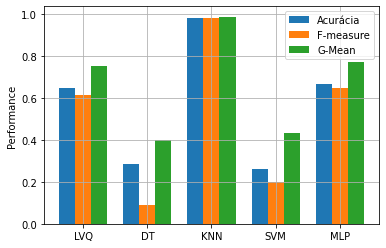

In [ ]:
#Plotando métricas de todos os modelos com os dados originais:
plot_metrics(metrics_orig)

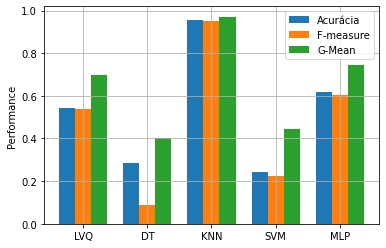

In [ ]:
#Plotando métricas de todos os modelos com os dados balanceados e com reduçao de dimensionalidade na base:
plot_metrics(metrics_br)

### Teste de Aderência

Foi aplicado o teste *t-student* para verificar o desempenho dos classificadores no conjunto de dados original e no conjunto modificado. Mas, antes da aplicação do teste *t*, foi verificado se os dados seguem normalidade, no qual, aplicou-se o teste *Shapiro-Wilk*, com *p-value*=0.05. Constatou-se que os dados seguem uma normalidade.


In [ ]:
import scipy.stats as stats

In [ ]:
# Teste de normalidade para acuracia no modelo 
def teste_shapiro(data):
  shapiro_stat, shapiro_p_valor=stats.shapiro(data)
  print('O valor da estatistica de Shapiro-Wilk =%.3f, O valor de p de Shapiro-Wilk=%.3f' % (shapiro_stat, shapiro_p_valor))
  alpha = 0.05
  if shapiro_p_valor > alpha:
	  print('O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)')
  else:
	  print('O conjunto de dados não se assemelha a uma Gaussiana (rejeita H0)')

#### Conjunto de dados original 

In [ ]:
for model in list(models.keys())[:-1]:
  print(f'\n** {model} **')
  for metric in ['acc', 'f1', 'gmean']:
    print(f'- Métrica: {metric}')
    teste_shapiro(metrics_orig[metric][model])


** LVQ **
- Métrica: acc
O valor da estatistica de Shapiro-Wilk =0.959, O valor de p de Shapiro-Wilk=0.772
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: f1
O valor da estatistica de Shapiro-Wilk =0.886, O valor de p de Shapiro-Wilk=0.153
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: gmean
O valor da estatistica de Shapiro-Wilk =0.908, O valor de p de Shapiro-Wilk=0.267
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)

** DT **
- Métrica: acc
O valor da estatistica de Shapiro-Wilk =0.869, O valor de p de Shapiro-Wilk=0.097
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: f1
O valor da estatistica de Shapiro-Wilk =0.887, O valor de p de Shapiro-Wilk=0.157
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: gmean
O valor da estatistica de Shapiro-Wilk =0.896, O valor de p de Shapiro-Wilk=0.199
O conjunto de dados se assemelha a uma Gaussiana ( não rejei

#### Conjunto de dados com classes balanceados e redução da dimensionalidade

In [ ]:
for model in list(models.keys())[:-1]:
  print(f'\n** {model} **')
  for metric in ['acc', 'f1', 'gmean']:
    print(f'- Métrica: {metric}')
    teste_shapiro(metrics_br[metric][model])


** LVQ **
- Métrica: acc
O valor da estatistica de Shapiro-Wilk =0.894, O valor de p de Shapiro-Wilk=0.186
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: f1
O valor da estatistica de Shapiro-Wilk =0.894, O valor de p de Shapiro-Wilk=0.189
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: gmean
O valor da estatistica de Shapiro-Wilk =0.963, O valor de p de Shapiro-Wilk=0.821
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)

** DT **
- Métrica: acc
O valor da estatistica de Shapiro-Wilk =0.933, O valor de p de Shapiro-Wilk=0.478
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: f1
O valor da estatistica de Shapiro-Wilk =0.955, O valor de p de Shapiro-Wilk=0.732
O conjunto de dados se assemelha a uma Gaussiana ( não rejeita H0)
- Métrica: gmean
O valor da estatistica de Shapiro-Wilk =0.981, O valor de p de Shapiro-Wilk=0.968
O conjunto de dados se assemelha a uma Gaussiana ( não rejei

### **Teste de Hipótese**

Considerando-se as seguintes hipóteses:

$H_0$ - Não há diferença significativa entre a perfomance dos modelos construídos no conjunto de dados original e no modificado.

$H_1$ - Há diferença significativa entre a perfomance dos modelos no conjunto de dados original e no modificado.

Aplicou-se o teste de hipótese *t-Student*, que é um teste estatístico não-paramétrico [9], para verificar se existem diferenças significativas entre as performances dos modelos construídos no conjunto de dados original e no conjunto modificado. Os resultados são apresentadas a seguir, para as diferentes métricas analisadas, ao nível de significância de 5%, i.e. com *p-valor* menor do que 0.05. Para um *p-valor* menor do que 0.05 rejeita-se a hipótese nula $H_0$ e aceita-se a hipótese alternativa de que há diferença significativa no desempenho dos modelos.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
from scipy.stats import ttest_ind
def teste_t(arr_1, arr_2):
    stat, p = ttest_ind(arr_1, arr_2)  
    print('O valor da estatistica =%.3f,  O valor de p =%.3f' % (stat, p))
    if p > 0.05: 
        print('A diferença entre as médias das métricas não é estatisticamente significante (não rejeita H0)')
    else:
        print('A diferença entre as médias das métricas é estatisticamente significante (rejeita H0)')

In [ ]:
for model in list(models.keys())[:-1]:
  print(f'\n** {model} **')
  for metric in ['acc', 'f1', 'gmean']:
    print(f'- Métrica: {metric}')
    teste_t(metrics_orig[metric][model],metrics_br[metric][model])



** LVQ **
- Métrica: acc
O valor da estatistica =1.251,  O valor de p =0.227
A diferença entre as médias das métricas não é estatisticamente significante (não rejeita H0)
- Métrica: f1
O valor da estatistica =-1.412,  O valor de p =0.175
A diferença entre as médias das métricas não é estatisticamente significante (não rejeita H0)
- Métrica: gmean
O valor da estatistica =-0.674,  O valor de p =0.509
A diferença entre as médias das métricas não é estatisticamente significante (não rejeita H0)

** DT **
- Métrica: acc
O valor da estatistica =12.641,  O valor de p =0.000
A diferença entre as médias das métricas é estatisticamente significante (rejeita H0)
- Métrica: f1
O valor da estatistica =7.889,  O valor de p =0.000
A diferença entre as médias das métricas é estatisticamente significante (rejeita H0)
- Métrica: gmean
O valor da estatistica =8.643,  O valor de p =0.000
A diferença entre as médias das métricas é estatisticamente significante (rejeita H0)

** KNN **
- Métrica: acc
O valo

Em relação a métrica de **acurácia**, o único modelo que aceita $H_0$ foi o LVQ. Assim, o modelo no conjunto de dados original e no conjunto modificado não apresentam diferença significativa. Os demais modelos (K-NN, DT, MLP e SVM) rejeitaram $H_0$, concluindo que apresentam diferença significativa. 

Em relação a métrica de **F-Measure**, o único modelo que aceita $H_0$ foi o LVQ. Assim, o modelo no conjunto de dados original e no conjunto modificado não apresentam diferença significativa. Os demais modelos (K-NN, DT, MLP e SVM) rejeitaram $H_0$, concluindo que apresentam diferença significativa. 

Em relação a métrica de **G-Mean**, os modelos LVQ e MLP aceitam $H_0$. Assim, os modelos no conjunto de dados original e no conjunto modificado não apresentam diferença significativa. Os demais modelos (K-NN, DT e SVM) rejeitaram $H_0$, concluindo que apresentam diferença significativa. 

##**Conclusão**

A proposta do trabalho foi de fazer um estudo comparativo sobre o desempenho de diferentes algoritmos de classificação (Árvore de Decisão, K-vizinhos mais próximos, Máquina de Vetor de Suporte, Quantização de Vetores de Aprendizagem e Perceptron Multi-Camadas) considerando o conjunto de dados original, com classes desbalanceadas e vários atributos (148) e no conjunto de dados modificado, no qual aplicou-se a técnica de *Undersampling* para lidar com o desbalanceamento das classes e com uso do *PCA* para redução de dimensionalidade.
 
 Antes da execução dos modelos, o conjunto de dados foi normalizado e foram aplicadas técnicas de pré-processamento para tratar os dados faltosos, atributos categóricos e foram retirados alguns atributos, por exemplo, que estavam altamente correlacionados. Às métricas utilizadas para avaliação do desempenho foram: acurácia, F-Measure e G-mean, escolheu-se outras métricas além da acurácia, diante que a acurácia não é indicada para ser utilizada quando se tem classes desbalanceadas, no qual, mostra só o percentual de acertos que o modelo teve. Foi utilizada uma validação cruzada de 2 folds em cinco repetições fez-se uso de busca em grade para ajuste dos hiperparâmetros dos modelos, considerando uma parte do conjunto de treino para validação.

Considerando o conjunto de dados original, o algoritmo K-NN apresentou um desempenho superior aos demais, com uma acurácia de 0.97, F-Measure de 0.97 e G-mean de 0.98. Outros dois modelos que apresentaram um desempenho satisfatório foram o SVM e MLP. Já a árvore de decisão e o LVQ apresentaram um desempenho bem inferior. Mesmo com o conjunto de dados com problemas de desbalanceamento de classes e com vários atributos, o K-NN se destacou pelo alto desempenho. Um ponto é que a maldição da dimensionalidade poderia atrapalhar as métricas de distância, pois teria pouca diferença entre os vizinhos mais proximos e mais distantes em caso de mais dimensões. Mas, mesmo assim o K-NN consegui apresentar bom desempenho. E outro ponto é que, por exemplo, se esperava que a árvore de decisão tivesse um desempenho melhor, diante que é um algoritmo que funciona bem em dados desbalanceados, com uma estrutura de regras (se-então) que de certa força as classes a serem abordadas. 
 
Para uma segunda etapa, o conjunto de dados foi modificado, no qual, lidou-se com o desbalanceamento das classes, em que cada classe ficou com um total de 3207, e com a alta dimensionalidade, ao aplicar o PCA, obtendo-se uma redução dos atributos, que eram mais de uma centena, para um total de apenas 18 atributos. Com esse conjunto de dados modificado aplicou-se novamente os algoritmos de classificação e o K-NN apresentou novamente um desempenho superior aos demais, com acurácia de 0.95, F-Measure de 0.95 e G-mean de 0.97. Em seguida, os modelos SVM e MLP tiveram também um desempenho satisfatorio. Já a árvore de decisão e o LVQ continuaram apresentando um desempenho bem inferior aos demais. 

Em seguida, ao se aplicar o teste de hipótese, ao nível de  significância de 5%, concluiu-se que os resultados obtidos para as métricas acurácia e F-Measure o LVQ apresentou uma diferença significativa no conjunto de dados original e o modificado. E os demais modelos não teve essa diferença. Já em relação a métrica G-mean os modelos LVQ e MLP apresentaram diferença e os demais modelos não. 

Por fim, uma constatação relevante, e de certa forma surpreendente, é que, com a redução da dimensionalidade e o balanceamento das classes, não observamos uma melhoria generalizada entre os modelos, o que indica que podem haver outros fatores mais determinantes da performance dos modelos e que não foram suficientemente explorados neste trabalho. Algo a se comentar é que muitos dos modelos não obtiveram a convergência dentro do número de iterações consideradas, dado que, com o alto número de instâncias foi necessário reduzir esse parâmetro para que os algoritmos executassem em tempo razoável.



##**Referências**

[1] FACELI, Katti et al. Inteligência Artificial: Uma abordagem de aprendizado de máquina. Rio de Janeiro: LTC, v. 2, p. 192, 2011.

[2] BOYLE, Tara. Dealing with Imbalanced Data A guide to effectively handling imbalanced datasets in Python. 2019. Disponível em: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18. Acesso em: 22 mar. 2021.

[3] RADEWAGEN, By Ye Wu & Rick. 7 Techniques to Handle Imbalanced Data. 2021. Disponível em: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html. Acesso em: 18 mar. 2021. 

[4] HARRISON, Matt. Machine Learning – Guia de Referência Rápida: Trabalhando com Dados Estruturados em Python. São Paulo: Novatec, 2020.

[5] JUNIOR, David Correa Martins. Redução de dimensionalidade utilizando entropia condicional média aplicada a problemas de bioinformática e de processamento de imagens. 2004. Tese de Doutorado. Instituto de Matemática e Estatística da Universidade de São Paulo, 22/09/2004.

[6] HONGYU, Kuang; SANDANIELO, Vera Lúcia Martins; DE OLIVEIRA JUNIOR, Gilmar Jorge. Análise de componentes principais: resumo teórico, aplicação e interpretação. E&S Engineering and Science, v. 5, n. 1, p. 83-90, 2016.
